# First analysis

Vamos a inspeccionar un poco la información que tenemos para tener más ideas de por dónde ampliarla posteriormente.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
data = pd.read_csv("data/clean.csv")
data = data.drop('Unnamed: 0', axis=1)
data.head()

,country,year,sex,age_range,suicide_number,population,suicides/100k,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [6]:
data.suicide_number[4]

9

# Sex

In [12]:
f_suicide = 0
m_suicide = 0
for n in data.suicide_number:
    if data.sex[n] == 'female':
        f_suicide += n
    else:
        m_suicide += n
        
sex_suicide = [f_suicide,m_suicide]
sex_suicide

[3463271, 3285149]

Estos datos me parecen tan impactantes que voy a comprobar si se está sumando bien la columna.

In [8]:
data.suicide_number.sum()

6748420

Efectivamente se está sumnado bien. Hablamos de que entre 1985 y 2016 (**en 31 años**), se han registrado en estos países un total de **más de 6 millones y medio de suicidios**, en su mayoría de mujeres. Intentaremos ampliar los países recogidos en este dataset más tarde, pero ya he podido comprobar que añadiendo países como Rusia o China al estudio, la cifra asciende a 24 millones de suicidios en 30 años, una media de 800 mil al año.

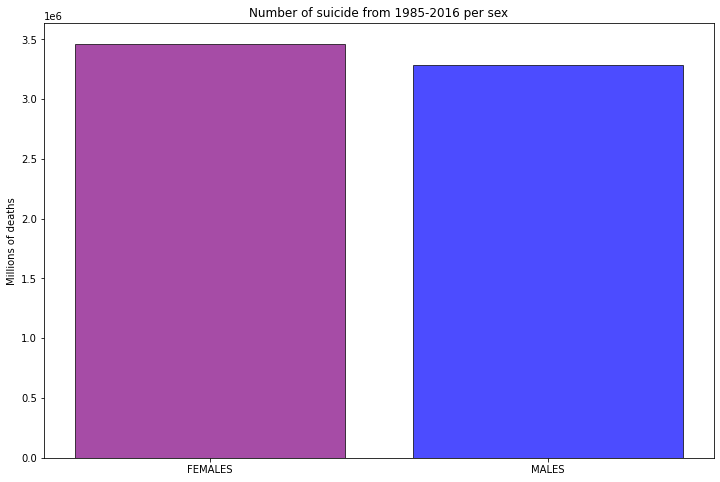

In [60]:
plt.figure(figsize=(12,8))
plt.ylabel("Millions of deaths")
plt.title('Number of suicide from 1985-2016 per sex')
plt.bar(['FEMALES','MALES'], sex_suicide, color=['purple','blue'],alpha = 0.7,edgecolor='black')


plt.show()
